# Sesión 7 - Árboles de decisión y Bosques aleatorios

![Consar logo](https://tse1.mm.bing.net/th/id/OIP.SsMll051THRYouS2FU5BbwHaHa?rs=1&pid=ImgDetMain&o=7&rm=3)

Alan Badillo Salas

*Miércoles 22, octubre 2025.*

## Fase 1 - Entrenamiento

* Adquicisión de los datos
* Limpieza de los datos (imputación)
* Construcción o selección de variables (ingeniería de variables o preprocesamiento)

Covariables (características) y las respuestas (predicciones)

Problemas de aprendizaje automático supervisado:

* **Respuesta continua**: Problema de Regresión
* **Respuesta discreta**: Problema de Clasificación

In [1]:
import pandas

casas = pandas.read_csv("casas.csv")

casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
z = pandas.qcut(casas["SalePrice"], q=4)
y = pandas.qcut(casas["SalePrice"], q=4, labels=False)

pandas.DataFrame([casas["SalePrice"], y, z]).T.sample(20)

,SalePrice,SalePrice,SalePrice
868,169000,2,"(163000.0, 214000.0]"
100,205000,2,"(163000.0, 214000.0]"
649,84500,0,"(34899.999, 129975.0]"
842,174900,2,"(163000.0, 214000.0]"
1236,175500,2,"(163000.0, 214000.0]"
189,286000,3,"(214000.0, 755000.0]"
1148,116900,0,"(34899.999, 129975.0]"
269,148000,1,"(129975.0, 163000.0]"
667,193500,2,"(163000.0, 214000.0]"
875,303477,3,"(214000.0, 755000.0]"


In [18]:
z = pandas.qcut(casas["SalePrice"], q=10)
y = pandas.qcut(casas["SalePrice"], q=10, labels=False)

pandas.DataFrame([casas["SalePrice"], y, z]).T.sample(20)

,SalePrice,SalePrice,SalePrice
1310,335000,9,"(278000.0, 755000.0]"
772,107000,1,"(106475.0, 124000.0]"
316,260000,8,"(230000.0, 278000.0]"
1,181500,6,"(179280.0, 198620.0]"
728,110000,1,"(106475.0, 124000.0]"
55,180500,6,"(179280.0, 198620.0]"
229,192500,6,"(179280.0, 198620.0]"
706,302000,9,"(278000.0, 755000.0]"
173,163000,4,"(147000.0, 163000.0]"
845,171000,5,"(163000.0, 179280.0]"


<Axes: ylabel='OverallQual'>

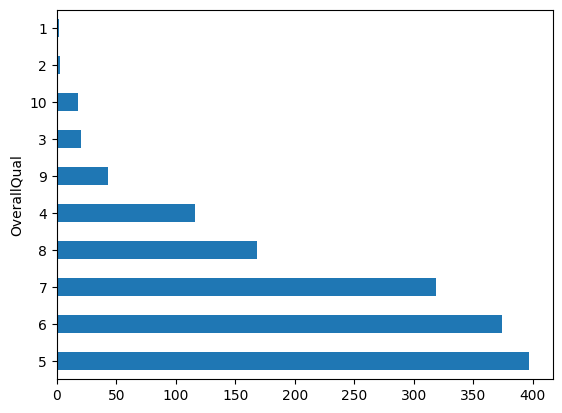

In [22]:
casas["OverallQual"].value_counts().plot.barh()

<Axes: ylabel='OverallCond'>

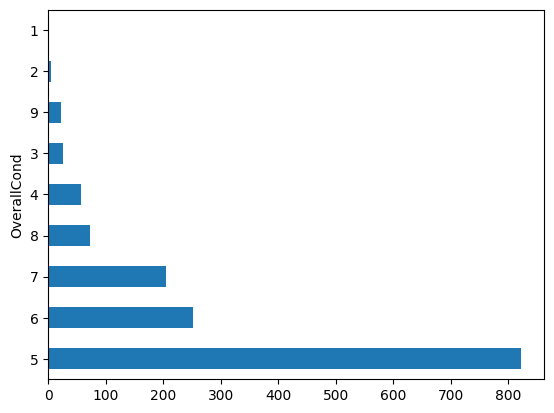

In [23]:
casas["OverallCond"].value_counts().plot.barh()

In [29]:
(2010 - casas["YearBuilt"]).sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 102, 104, 105, 106, 110, 112,
       117, 118, 120, 125, 128, 130, 135, 138])

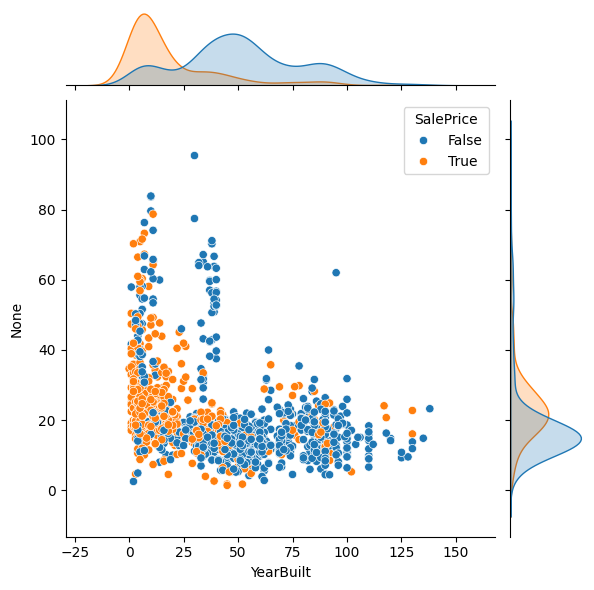

In [ ]:
import seaborn

seaborn.jointplot(
    x=(2010 - casas["YearBuilt"]), 
    y=casas["SalePrice"] / casas["LotArea"],
    hue=y > 5
)

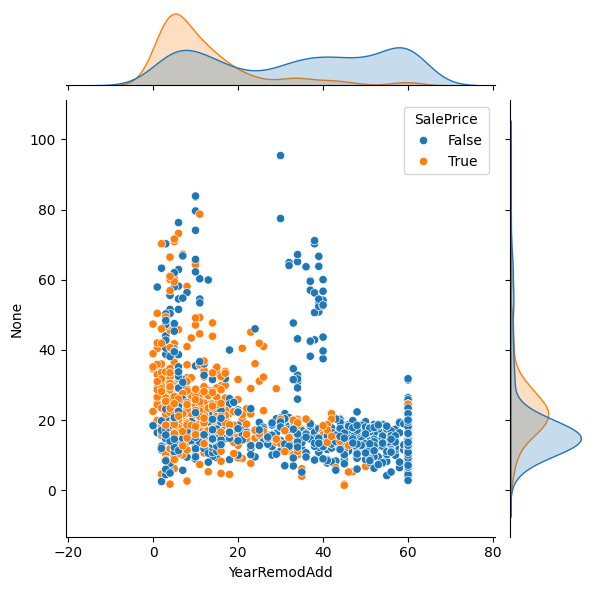

In [35]:
import seaborn

seaborn.jointplot(
    x=(2010 - casas["YearRemodAdd"]), 
    y=casas["SalePrice"] / casas["LotArea"],
    hue=y > 5
)

In [20]:
casas[["LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd"]].head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,8450,7,5,2003,2003
1,9600,6,8,1976,1976
2,11250,7,5,2001,2002
3,9550,7,5,1915,1970
4,14260,8,5,2000,2000


In [37]:
x1 = casas["LotArea"]
x2 = casas["OverallQual"]
x3 = 2010 - casas["YearBuilt"]

y = pandas.qcut(casas["SalePrice"], q=2, labels=False)

$$
X \rightarrow y
$$

donde $X = (x_1 \mid x_2 \mid x_3)$

In [42]:
import numpy

X = numpy.vstack([x1, x2, x3]).T

X

array([[ 8450,     7,     7],
       [ 9600,     6,    34],
       [11250,     7,     9],
       ...,
       [ 9042,     7,    69],
       [ 9717,     5,    60],
       [ 9937,     5,    45]])

In [ ]:
! python -m pip install scikit-learn

## Fase 2 - Ajuste del modelo

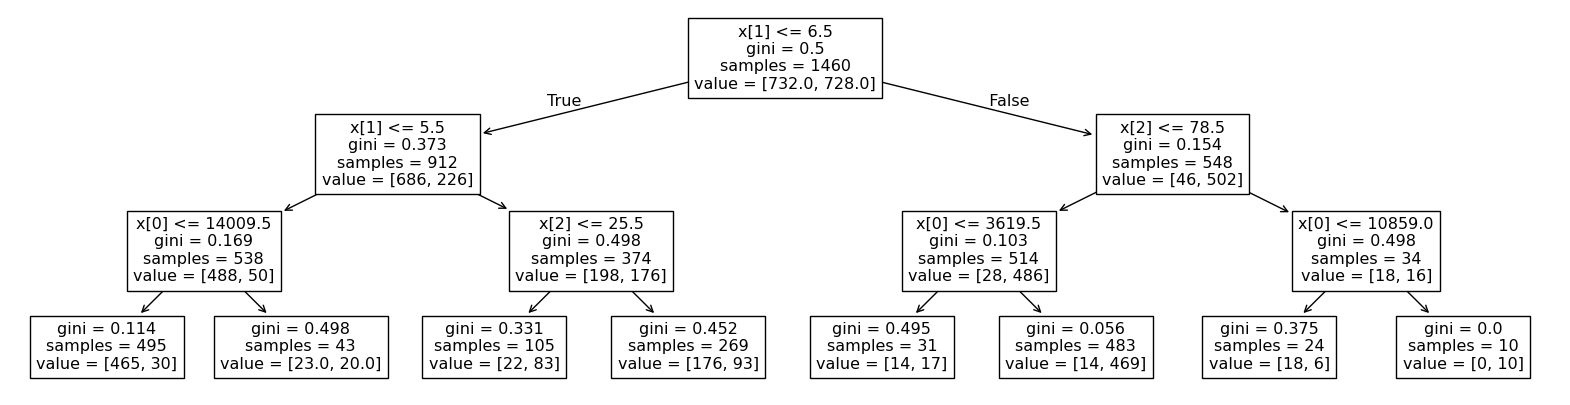

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as pyplot

model = DecisionTreeClassifier(max_depth=3, random_state=123) # random_state -> semilla

model.fit(X, y)

figure, axis = pyplot.subplots(figsize=(20, 5))
plot_tree(model)
pyplot.show()

## Fase 3 - Validación

* **Accuracy / Exactitud** - Que tan exacto es el modelo, es decir, que tanto no miente
* **Precision / Precisión** - Que tan preciso es el modelo, es decir, cuando la predicción es 1, que tan correcto es el valor real
* **Recall / Sensibilidad** - Que tan sensible es el modelo, es decir, cuando el valor real es 1, qué tan correcta es la predicción
* **Specificity / Especificidad** - Que tan específico es el modelo, cuando la predicción es 0, que tan correcto es el valor real
* **F1-score** - Que tanto balance hay entre precisión y sensibilidad, es decir, entre que la predicción es 1, y que el valor real es 1

In [53]:
yp = model.predict(X)

pandas.DataFrame([y, yp], index=["Sale Price", "Sale Price (predict)"]).T.sample(20)

,Sale Price,Sale Price (predict)
507,1,1
947,1,1
604,1,1
1133,1,1
1342,1,1
624,1,0
56,1,1
668,1,0
28,1,0
1215,0,0


<Axes: >

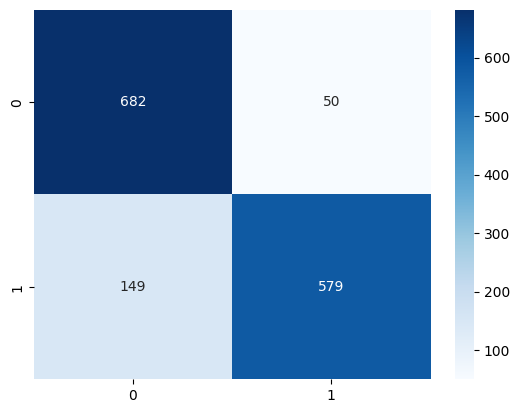

In [57]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y, yp)

seaborn.heatmap(mat, cmap="Blues", annot=True, fmt=".0f")

In [59]:
tn, fp, fn, tp = mat.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"""
Accuracy:    {accuracy:.2f}
Precision:   {precision:.2f}
Recall:      {recall:.2f}
Specificity: {specificity:.2f}
F1-score:    {f1:.2f}
""")


Accuracy:    0.86
Precision:   0.92
Recall:      0.80
Specificity: 0.82
F1-score:    0.85




Accuracy:    0.97
Precision:   0.98
Recall:      0.96
Specificity: 0.96
F1-score:    0.97



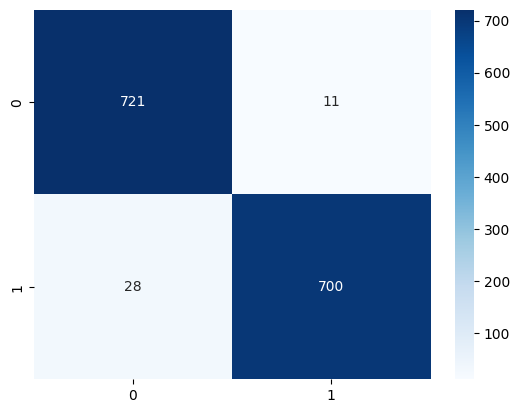

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10)

model.fit(X, y)

yp = model.predict(X)

mat = confusion_matrix(y, yp)

seaborn.heatmap(mat, cmap="Blues", annot=True, fmt=".0f")

tn, fp, fn, tp = mat.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"""
Accuracy:    {accuracy:.2f}
Precision:   {precision:.2f}
Recall:      {recall:.2f}
Specificity: {specificity:.2f}
F1-score:    {f1:.2f}
""")